## Gaussian Healtmap for Court Keypoints Detection

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import torch

from Plot import plot_cv, plot_img

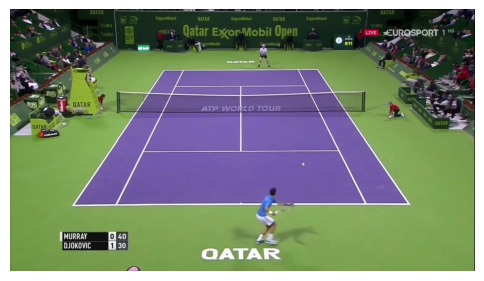

In [2]:
path = "../Data/tennis_game_4.jpg"
img = cv.imread(path, cv.IMREAD_COLOR_RGB)
h, w, _ = img.shape
plot_img(img, gray = False)

In [3]:
data = {
    "boxes": [
        {"label": "1","x": 422,"y": 167,"width": 20,"height": 20},
        {"label": "2","x": 474,"y": 167,"width": 20,"height": 20},
        {"label": "3","x": 791,"y": 165,"width": 20,"height": 20},
        {"label": "4","x": 845,"y": 165,"width": 20,"height": 20},
        {"label": "5","x": 453,"y": 211,"width": 20,"height": 20},
        {"label": "6","x": 633,"y": 211,"width": 20,"height": 20},
        {"label": "7","x": 814,"y": 210,"width": 20,"height": 20},
        {"label": "8","x": 363,"y": 390,"width": 20,"height": 20},
        {"label": "9","x": 633,"y": 389,"width": 20,"height": 20},
        {"label": "10","x": 905,"y": 388,"width": 20,"height": 20},
        {"label": "11","x": 172,"y": 538,"width": 20,"height": 20},
        {"label": "12","x": 287,"y": 537,"width": 20,"height": 20},
        {"label": "13","x": 980,"y": 534,"width": 20,"height": 20},
        {"label": "14","x": 1097,"y": 534,"width": 20,"height": 20}
    ],
    "height": 720,
    "key": "tennis_game_4.jpg",
    "width": 1280
} # all of this coordinates was provided by Roboflow in the process of labeling

coords = [
    (box["x"] + box["width"] // 2, box["y"] + box["height"] // 2)
    for box in data["boxes"]
]
coords

[(432, 177),
 (484, 177),
 (801, 175),
 (855, 175),
 (463, 221),
 (643, 221),
 (824, 220),
 (373, 400),
 (643, 399),
 (915, 398),
 (182, 548),
 (297, 547),
 (990, 544),
 (1107, 544)]

## Two-dimensional Gaussian function

Base form:

$$
f(x,y) = \exp(-x^2 - y^2)
$$

In two dimensions, the power to which \( e \) is raised in the Gaussian function is any negative-definite quadratic form. Consequently, the level sets of the Gaussian will always be ellipses.

A particular example of a two-dimensional Gaussian function is

$$
f(x,y) = A \exp\left(-\left(\frac{(x - x_0)^2}{2\sigma_X^2} + \frac{(y - y_0)^2}{2\sigma_Y^2} \right)\right).
$$

https://en.wikipedia.org/wiki/Gaussian_function

The output tensor has 14 channels


In [4]:
def gaussian_heatmap(height, width, coords, sigma=3):
    num_points = len(coords)
    heatmaps = torch.zeros((num_points, height, width), dtype=torch.float32)

    x = torch.arange(0, width, dtype=torch.float32).view(1, width).expand(height, width)
    y = torch.arange(0, height, dtype=torch.float32).view(height, 1).expand(height, width)

    for i, (cx, cy) in enumerate(coords):
        if cx < 0 or cy < 0 or cx >= width or cy >= height:
            continue  

        g = torch.exp(-((x - cx) ** 2 + (y - cy) ** 2) / (2 * sigma ** 2))

        g = g / g.max()
        heatmaps[i] = g

    return heatmaps

In [5]:
heatmap = gaussian_heatmap(h, w, coords)
heatmap.shape

torch.Size([14, 720, 1280])

In [ ]:
def visualize_heatmaps(heatmaps, size = (6, 8), colorbar = False):        
    heatmaps = heatmaps.cpu().numpy()
    combined = np.sum(heatmaps, axis=0)

    combined = (combined - combined.min()) / (combined.max() - combined.min())

    plt.figure(figsize = size)
    plt.imshow(combined, cmap = "hot")
    plt.axis('off')
    if colorbar:
        plt.colorbar()
    plt.show()

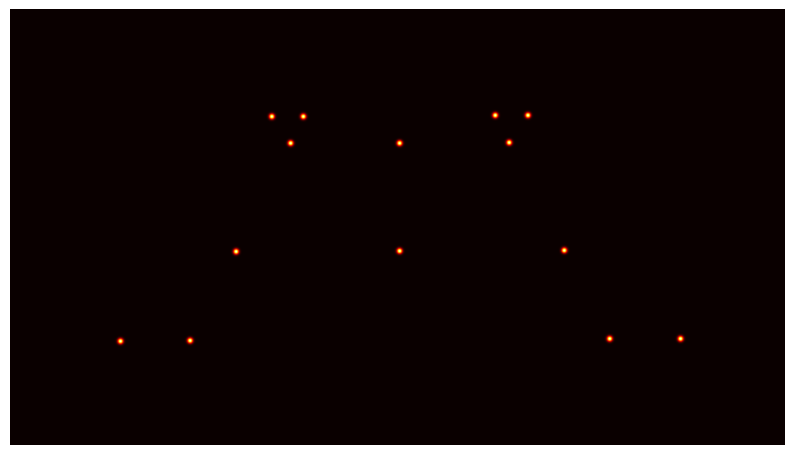

In [7]:
visualize_heatmaps(heatmap, size = (10, 8))